Youth Risk Behavioral Surveillance System Report (YRBSS) on North Carolina Respondents from 2015-2023  
Tyler West  
Decmber 9th, 2025  
---


## GitHub Repository: https://github.com/tawest2020/BIOS512_FINAL

## Overview:

The Youth Risk Behavioral Surveillance System (YRBSS) measures health-related behaviors and experiences that can lead to death and disability among youth and adults. Results help monitor health trends, identify emerging issues, and plan and evaluate programs that can help improve adolescent health. It's main purpose is to determine how often unhealthy behaviors occur.

On CDC’s website for YRBSS is a data access page where you can download all national data, region level, and by level of education (middle school or high school). For the purpose of my investigation, I chose highschool students in states N-P, with a plan to filter for North Carolina.

The download was a ASCII file, which is used for SAS. In class, Professor Toups was able to convert our ASCII data into a CSV for easier access and modification of variables, and filtered for NC only observations.


## Codebook:

1. YEAR - What year was the survey taken in?
2. SEX - What is the reported biological sex? (M=1/F=2)
3. GRADE - What grade is the student in? (9-12)
4. RACE7 - What is the reported race/ethnicity? (1-7)  
    1 = “American Indian/Alaska Native”  
    2 = “Asian”  
    3 = “Black or African American”  
    4 = “Hispanic/Latino”  
    5 = “Native Hawaiian/Other Pacific Islander”  
    6 = “White”  
    7 = “Multiple Races (Non-Hispanic)”  
5. FIGHT - Fights involved in within the last 12 months (1-8)  
    1 = 0 fights, 2 = 1, 3 = 2-3, so forth until 8 = 12+
6. DRINK - Days involving alcohol consumption in the last month? (1-7)  
    1 = 0 days  
    2 = 1 or 2 days  
    3 = 3 to 5 days  
    4 = 6 to 9 days  
    5 = 10 to 19 days  
    6 = 20 to 29 days  
    7 = All 30 days  
7. MARIJUANA - Times used marijuana in the last month? (1-6)  
    1 =  0 times  
    2 = 1 or 2 times  
    3 = 3 to 9 times  
    4 = 10 to 19 times  
    5 = 20 to 39 times  
    6 = 40 or more times  
8. MULTPART - Number of Sexual Partners (1-7)  
    1 = 0 partners, 2 = 1 partner, so forth til 7 = 6+
9. ACTIVITY - Days per week where 60+ minutes of physical activity was met (1-8)  
    1 = 0 days, 2 = 1 day, so forth
10. SLEEP - Hours of sleep per night (1-7)  
    1 = 4 or less, 2 = 5 hours, so forth until 7 = 10+ hours
11. GRADES - Self-reported averages grades in school (1-7)  
    1 = As  
    2 = Bs  
    3 = Cs  
    4 = Ds  
    5 = Unsure  
    6 = Mixture of grades  
    7 = Fs  
12. BULLIED_D - Bullied in the past year (Y/N)
13. PLAN_D - Was a suicide plan made at least once in the past year? (Y/N)
14. WEIGHT_D - Self-reported as overweight? (Y/N)
15. VAPE_D - Vaped in the past month? (Y/N)
16. FRUIT_D - Did not consume fruit product in past week (Y/N)
17. VEG_D - Did not consume vegetable product in past week (Y/N)

## Data preprocessing:

### Step 1: Load in tidyverse

In [1]:
suppressPackageStartupMessages(library(tidyverse))

### Step 2: Call in my dataset

In [4]:
YRBSS <- read.csv("NC_YRBSS.csv")
head(YRBSS, 10)

,YEAR,SEX,GRADE,RACE7,FIGHT,DRINK,MARIJUANA,MULTPART,ACTIVITY,SLEEP,GRADES,BULLIED_D,PLAN_D,WEIGHT_D,VAPE_D,FRUIT_D,VEG_D
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2023,2,3,NA,3,3,NA,NA,1,1,2,2,1,2,2,1,2
2,2023,2,1,3,1,2,3,1,1,4,2,2,2,2,2,1,2
3,2023,2,1,3,1,1,1,1,1,1,2,2,2,2,2,2,1
4,2023,2,1,6,3,3,1,1,8,3,1,2,1,2,2,2,2
5,2023,2,1,6,1,1,1,1,7,3,1,2,1,2,2,2,2
6,2023,2,1,3,1,1,1,NA,1,5,4,2,2,2,2,2,1
7,2023,2,1,2,2,1,1,1,6,5,1,1,2,2,2,2,2
8,2023,2,1,6,1,1,1,1,3,2,2,2,2,2,2,2,2
9,2023,2,1,4,1,1,1,1,8,6,2,2,2,2,2,2,2


### Step 3a: Filter dataset
I applied a filter for the YEAR variable to include values between 2015 to 2023, and then recoded NA observations in RACE7 to 8 so they could be observed as a "Missing" group. I also ran a head and summary function so I could view examples of a new table and see ranges and missing observations from each variable.

In [5]:
suppressPackageStartupMessages(library(dplyr))

YRBSS_10 <- YRBSS %>%
  filter(YEAR >= 2015, YEAR <= 2023) %>%
  mutate(RACE7 = if_else(is.na(RACE7), 8L, RACE7)) %>%
  arrange(YEAR)

head(YRBSS_10, 10)
summary(YRBSS_10)

,YEAR,SEX,GRADE,RACE7,FIGHT,DRINK,MARIJUANA,MULTPART,ACTIVITY,SLEEP,GRADES,BULLIED_D,PLAN_D,WEIGHT_D,VAPE_D,FRUIT_D,VEG_D
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2015,NA,4,6,1,1,1,5,4,4,3,2,2,2,2,1,1
2,2015,NA,NA,8,NA,NA,6,NA,8,NA,7,NA,NA,NA,2,2,NA
3,2015,NA,NA,8,2,1,1,2,4,4,4,2,2,2,2,2,2
4,2015,NA,NA,8,2,1,4,2,NA,NA,NA,2,1,NA,NA,NA,NA
5,2015,NA,NA,8,2,7,NA,3,4,3,3,NA,NA,2,2,2,2
6,2015,NA,NA,3,NA,NA,3,NA,3,NA,5,NA,2,NA,2,NA,NA
7,2015,NA,4,4,6,NA,NA,NA,1,4,3,NA,1,2,2,2,2
8,2015,NA,NA,2,7,2,2,3,1,1,1,NA,2,2,NA,1,1
9,2015,NA,NA,4,NA,7,2,3,5,2,6,1,2,2,1,2,2


      YEAR           SEX            GRADE           RACE7           FIGHT      
 Min.   :2015   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2015   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:3.000   1st Qu.:1.000  
 Median :2017   Median :1.000   Median :2.000   Median :4.000   Median :1.000  
 Mean   :2018   Mean   :1.488   Mean   :2.294   Mean   :4.733   Mean   :1.494  
 3rd Qu.:2019   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000   3rd Qu.:1.000  
 Max.   :2023   Max.   :2.000   Max.   :4.000   Max.   :8.000   Max.   :8.000  
                NA's   :124     NA's   :200                     NA's   :415    
     DRINK         MARIJUANA       MULTPART        ACTIVITY         SLEEP      
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :1.00   Median :1.000   Median :4.000   Median :3.000  
 Mean   :1.472   Mean   :1.49   Mean   :

### Step 3b: Filter out all remaining NA observations from dataset

In [6]:
sum(complete.cases(YRBSS_10))
sum(!complete.cases(YRBSS_10))
YRBSS_c <- YRBSS_10[complete.cases(YRBSS_10), ]
YRBSS_100 <- subset(YRBSS_c, select = -YEAR)
sum(!complete.cases(YRBSS_100))

[1] 11238

[1] 5117

[1] 0

### Step 4: Model histogram distributions of example variables
I wanted to view an early visualization of the spread of certain answers whether ordinal/categorical or continuous.

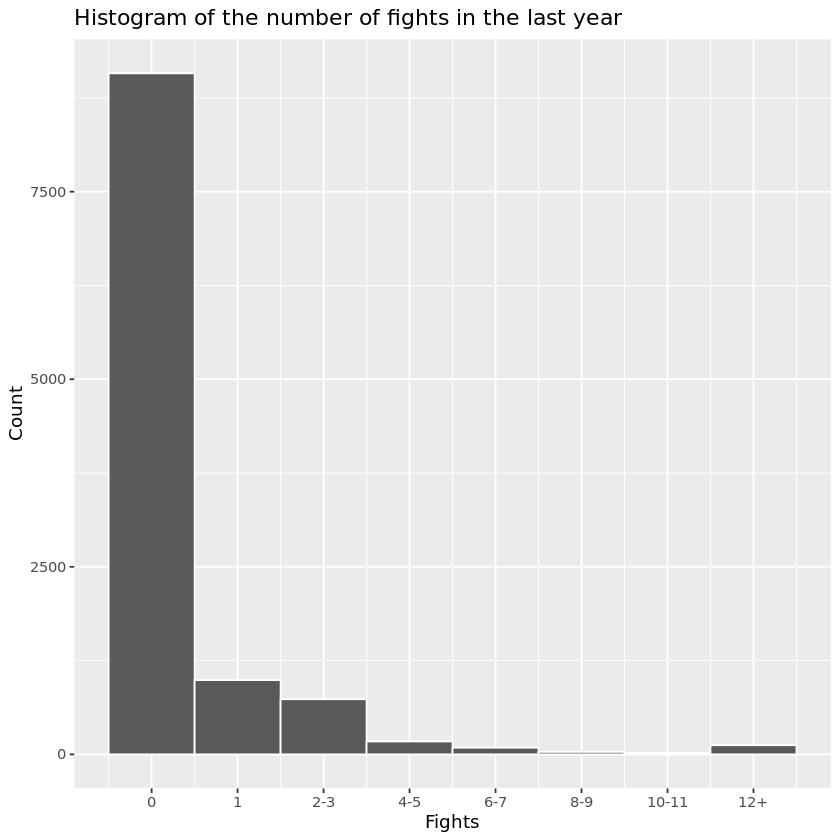

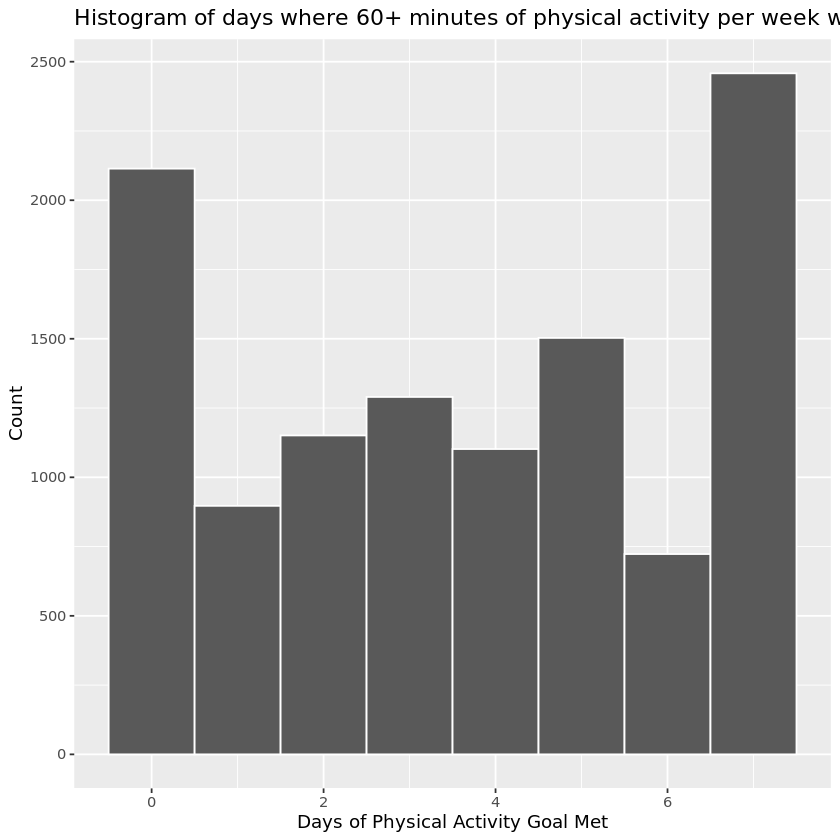

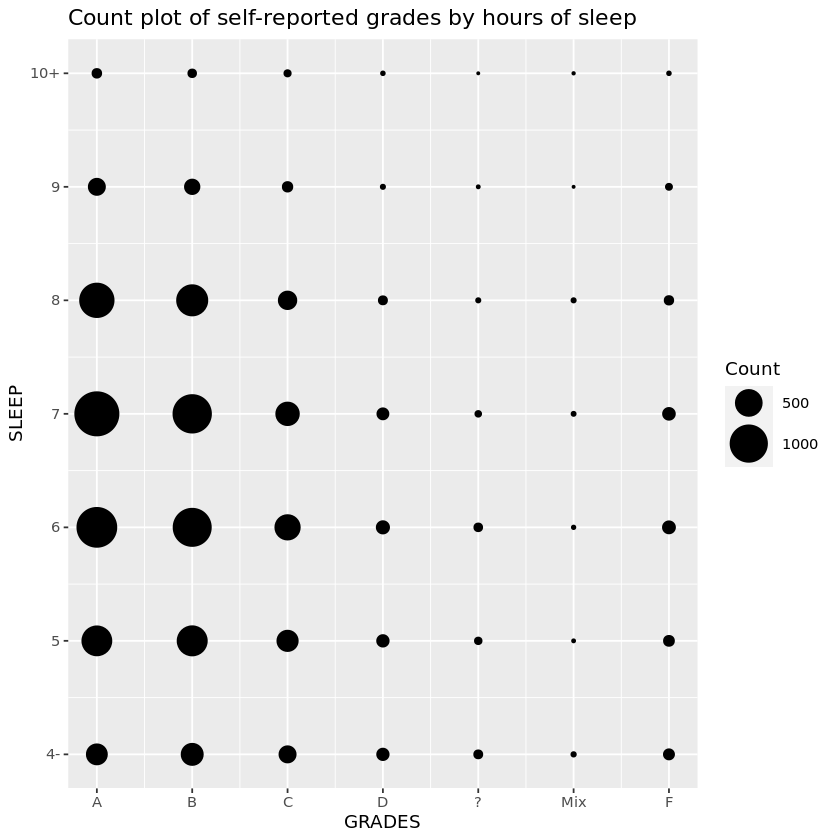

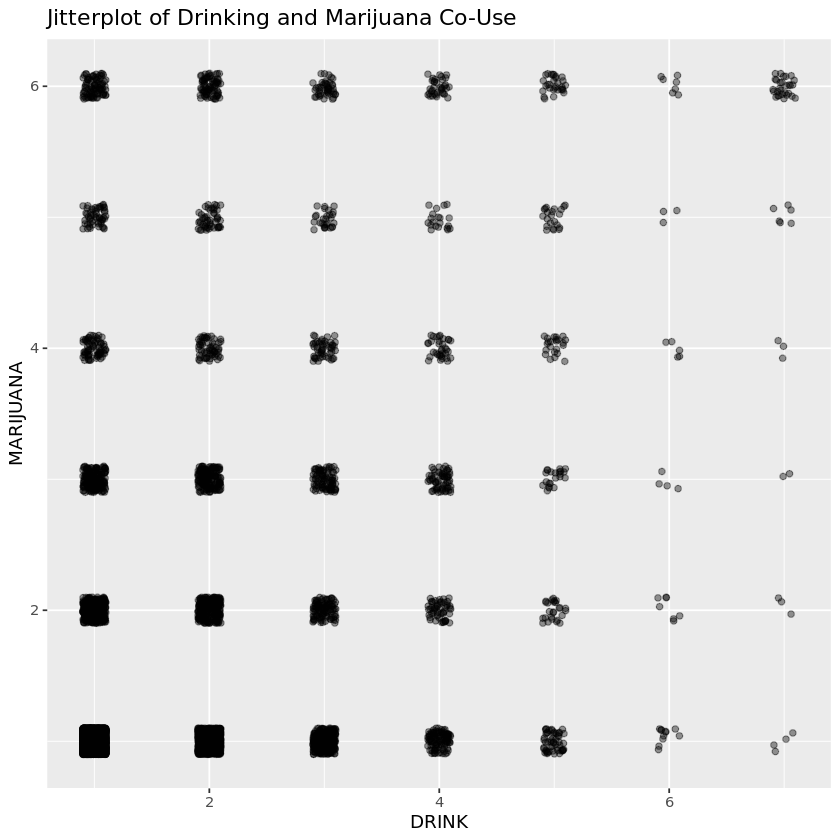

In [7]:
suppressPackageStartupMessages(library(ggplot2))

ggplot(YRBSS_100, aes(x = FIGHT)) +
  geom_histogram(binwidth = 1, color = "white") +
  labs(title = "Histogram of the number of fights in the last year",
       x = "Fights",
       y = "Count") +
  scale_x_continuous(
    breaks = 1:8, 
    labels = c("0","1","2-3","4-5","6-7", "8-9", "10-11", "12+")
  )

ggplot(YRBSS_100, aes(x = ACTIVITY - 1)) +
  geom_histogram(binwidth = 1, color = "white") +
  labs(title = "Histogram of days where 60+ minutes of physical activity per week were met",
       x = "Days of Physical Activity Goal Met",
       y = "Count")

ggplot(YRBSS_100, aes(x = GRADES, y = SLEEP)) +
  geom_count() +
  scale_size_area(max_size = 12) +
  labs(
    title = "Count plot of self-reported grades by hours of sleep",
    size = "Count") +
  scale_x_continuous(
    breaks = 1:7, 
    labels = c("A","B","C","D","?", "Mix", "F")
  ) +
  scale_y_continuous(
    breaks = 1:7, 
    labels = c("4-","5","6","7","8", "9", "10+")
  )

ggplot(YRBSS_100, aes(x = DRINK, y = MARIJUANA)) +
  geom_jitter(width = 0.1, height = 0.1, alpha = 0.4) + 
  labs(title = "Jitterplot of Drinking and Marijuana Co-Use")

### Initial takeaways:
For viewing purposes, axes were remodled after the codebook classification, and for ACTIVITY, 1 was subtracted from each score so that the option started with 0 instead of 1. It is clear that viewing on a basic level like this is limited with results, as many answers have rare outcomes, such as high number of fights, lower grades, and frequent drinking. However, there are still interesting findings, such as peaks at both extremes of days physically active and more frequent cannabis use than drinking. This is interesting but not by any means significant towards understanding relationships between variables.

## kmeans analysis (Clustering)

### Guiding question for clustering:
Does natural clusterization exist between certain groupings of variables, and does a common theme exist between them? (ie: social, physical, mental health related groupings)  

### Builder Function Steps 1-4


In [8]:
builder <- function(n_points, n_clusters){
sample(((1:n_points) %% n_clusters)+1, n_points, replace=F)
}
get_cluster_means <- function(data, labels){
data %>%
mutate(label__ = labels) %>%
group_by(label__) %>%
summarize(across(everything(), mean), .groups = "drop") %>%
arrange(label__)
}
assign_cluster_fast <- function(data, means){
data_matrix <- as.matrix(data)
means_matrix <- as.matrix(means %>% dplyr::select(-label__))
dii <- sort(rep(1:nrow(data), nrow(means)))
mii <- rep(1:nrow(means), nrow(data))
data_repped <- data_matrix[dii, ]
means_repped <- means_matrix[mii, ]
diff_squared <- (data_repped - means_repped)^2
all_distances <- rowSums(diff_squared)
tibble(dii=dii, mii=mii, distance=all_distances) %>%
group_by(dii) %>%
arrange(distance) %>%
filter(row_number()==1) %>%
ungroup() %>%
arrange(dii) %>%
pull(mii)
}
kmeans_done <- function(old_means, new_means, eps=1e-6){
om <- as.matrix(old_means)
nm <- as.matrix(new_means)
m <- mean(sqrt(rowSums((om - nm)^2)))
if(m < eps) TRUE else FALSE
}
mykmeans <- function(data, n_clusters, eps=1e-6, max_it = 1000, verbose = FALSE){
labels <- builder(nrow(data), n_clusters)
old_means <- get_cluster_means(data, labels)
done <- FALSE
it <- 0
while(!done & it < max_it){
labels <- assign_cluster_fast(data, old_means)
new_means <- get_cluster_means(data, labels)
if(kmeans_done(old_means, new_means)){
done <- TRUE
} else {
old_means <- new_means
it <- it + 1
if(verbose){
cat(sprintf("%d\n", it))
}
}
}
list(labels=labels, means=new_means)
}

### Run my kmeans function

In [9]:
label_randomly <- function(n_points, n_clusters){
sample(((1:n_points) %% n_clusters)+1, n_points, replace=F)
}
get_cluster_means <- function(data, labels){
data %>%
mutate(label__ = labels) %>%
group_by(label__) %>%
summarize(across(everything(), mean), .groups = "drop") %>%
arrange(label__)
}
assign_cluster_fast <- function(data, means){
data_matrix <- as.matrix(data)
means_matrix <- as.matrix(means %>% dplyr::select(-label__))
dii <- sort(rep(1:nrow(data), nrow(means)))
mii <- rep(1:nrow(means), nrow(data))
data_repped <- data_matrix[dii, ]
means_repped <- means_matrix[mii, ]
diff_squared <- (data_repped - means_repped)^2
all_distances <- rowSums(diff_squared)
tibble(dii=dii, mii=mii, distance=all_distances) %>%
group_by(dii) %>%
arrange(distance) %>%
filter(row_number()==1) %>%
ungroup() %>%
arrange(dii) %>%
pull(mii)
}
kmeans_done <- function(old_means, new_means, eps=1e-6){
om <- as.matrix(old_means)
nm <- as.matrix(new_means)
m <- mean(sqrt(rowSums((om - nm)^2)))
if(m < eps) TRUE else FALSE
}
mykmeans <- function(data, n_clusters, eps=1e-6, max_it = 1000, verbose = FALSE){
labels <- label_randomly(nrow(data), n_clusters)
old_means <- get_cluster_means(data, labels)
done <- FALSE
it <- 0
while(!done & it < max_it){
labels <- assign_cluster_fast(data, old_means)
new_means <- get_cluster_means(data, labels)
if(kmeans_done(old_means, new_means)){
done <- TRUE
} else {
old_means <- new_means
it <- it + 1
if(verbose){
cat(sprintf("%d\n", it))
}
}
}
list(labels=labels, means=new_means)
}
myresults <- mykmeans(YRBSS_100, 3)
print(myresults$means)

# A tibble: 3 × 17
  label__   SEX GRADE RACE7 FIGHT DRINK MARIJUANA MULTPART ACTIVITY SLEEP GRADES
    <int> <dbl> <dbl> <dbl> <dbl> <dbl>     <dbl>    <dbl>    <dbl> <dbl>  <dbl>
1       1  1.35  2.33  4.65  1.23  1.30      1.24     1.43     2.24  3.35   2.14
2       2  1.54  2.13  4.98  1.30  1.30      1.16     1.40     6.79  3.64   1.86
3       3  1.58  2.89  4.85  2.39  2.52      3.19     5.16     5.11  2.96   2.57
# ℹ 6 more variables: BULLIED_D <dbl>, PLAN_D <dbl>, WEIGHT_D <dbl>,
#   VAPE_D <dbl>, FRUIT_D <dbl>, VEG_D <dbl>


### Add clusters to dataset and confirm presence

In [10]:
YRBSS_k <- YRBSS_100
YRBSS_k$cluster <- myresults$labels

head(YRBSS_k, 10)

,SEX,GRADE,RACE7,FIGHT,DRINK,MARIJUANA,MULTPART,ACTIVITY,SLEEP,GRADES,BULLIED_D,PLAN_D,WEIGHT_D,VAPE_D,FRUIT_D,VEG_D,cluster
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
56,2,1,7,8,4,5,5,8,2,2,1,1,2,1,1,2,3
60,2,4,6,8,3,1,2,8,1,3,2,1,2,1,2,2,3
66,2,4,4,8,7,6,7,3,3,2,2,1,1,1,1,1,3
77,2,1,3,1,1,1,1,6,3,2,2,2,1,2,2,2,2
78,2,2,4,1,1,1,1,4,3,2,2,2,2,2,2,2,1
83,2,4,1,6,5,4,7,8,2,3,1,1,2,1,2,2,3
85,2,1,6,1,1,1,1,1,5,2,2,2,2,2,2,2,1
87,2,1,6,1,1,1,1,5,5,1,2,2,2,2,2,2,2
88,2,1,6,2,1,1,1,6,4,2,1,2,1,2,2,2,2


## t-SNE Analysis (Dimensionality Reduction)  

### Load in Rtsne and perform a PCA followed by t-SNE

In [16]:
install.packages("Rtsne")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.5957 1.24789 1.17896 1.12839 1.05488 0.98128 0.96823
Proportion of Variance 0.1591 0.09733 0.08687 0.07958 0.06955 0.06018 0.05859
Cumulative Proportion  0.1591 0.25647 0.34334 0.42292 0.49247 0.55265 0.61125
                           PC8     PC9   PC10   PC11    PC12    PC13    PC14
Standard deviation     0.90125 0.89735 0.8745 0.8626 0.84922 0.82670 0.77881
Proportion of Variance 0.05077 0.05033 0.0478 0.0465 0.04507 0.04271 0.03791
Cumulative Proportion  0.66201 0.71234 0.7601 0.8066 0.85171 0.89443 0.93234
                          PC15   PC16
Standard deviation     0.76691 0.7032
Proportion of Variance 0.03676 0.0309
Cumulative Proportion  0.96910 1.0000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
SEX,-0.05805886,0.36287296,0.42118243,0.21962680,-0.06102975,0.10816511,-0.424579615,0.073826151,-0.028366986,0.049793410,0.13362370,0.05191953,-0.52191222,-0.368953071,-0.041615014,0.063982741
GRADE,-0.15913981,-0.03106154,0.01355171,-0.61041036,0.13182093,-0.03212816,-0.431843214,0.366467059,0.100081335,-0.050637447,0.06625972,-0.03421917,-0.10616386,0.263889691,0.335937690,-0.223215597
RACE7,-0.03328160,0.15617901,-0.22730156,0.14322011,0.67612591,0.11629540,-0.239756288,-0.332939695,0.203803068,-0.382127044,-0.14428699,0.13914989,-0.05365196,0.097583407,-0.140065105,-0.059683994
FIGHT,-0.34400650,0.12035567,0.10406731,0.28511411,-0.18758764,0.05879084,0.073486698,-0.041708211,-0.352924858,-0.264910642,-0.36747979,-0.30561757,-0.19671183,0.470886222,0.186918152,-0.103555572
DRINK,-0.43832570,0.08799315,-0.12170925,-0.09279671,0.10455178,0.05275556,0.149178253,-0.110891839,-0.055950269,-0.078752444,-0.05569274,0.06031296,0.13313903,-0.437644619,0.586440842,0.398992044
MARIJUANA,-0.46607030,0.06604631,0.01299661,-0.09956990,-0.01922471,0.06771205,0.230785986,-0.016692736,0.011692511,0.007363378,-0.01963953,0.05001139,0.07549727,-0.357206047,-0.234595402,-0.720020259
MULTPART,-0.43202703,0.09494476,0.06126197,-0.19307623,-0.03944118,-0.04747712,-0.044123116,0.278495233,0.010848628,-0.194545383,-0.01367996,-0.04603198,0.18392445,0.068118631,-0.614304029,0.473160730
ACTIVITY,-0.01114571,0.53084196,-0.03518732,0.26768961,0.04002187,-0.13375322,-0.233868542,0.102854889,-0.197760339,0.153630285,0.28918281,0.03160593,0.60324941,0.144269846,0.112722206,-0.125117667
SLEEP,0.18429378,0.31175824,0.02990688,0.05860743,0.14818220,0.41382603,0.509965781,0.474784355,0.256688666,-0.214103700,0.20288341,-0.10357616,-0.08493005,0.071085268,0.099647517,0.001762298
GRADES,-0.17279830,-0.21837343,0.30496618,0.24658159,-0.31931399,0.23044645,-0.186149156,-0.096615001,0.643466898,-0.116459844,-0.02433717,0.12827460,0.29955376,0.123581239,0.139666242,-0.020575084


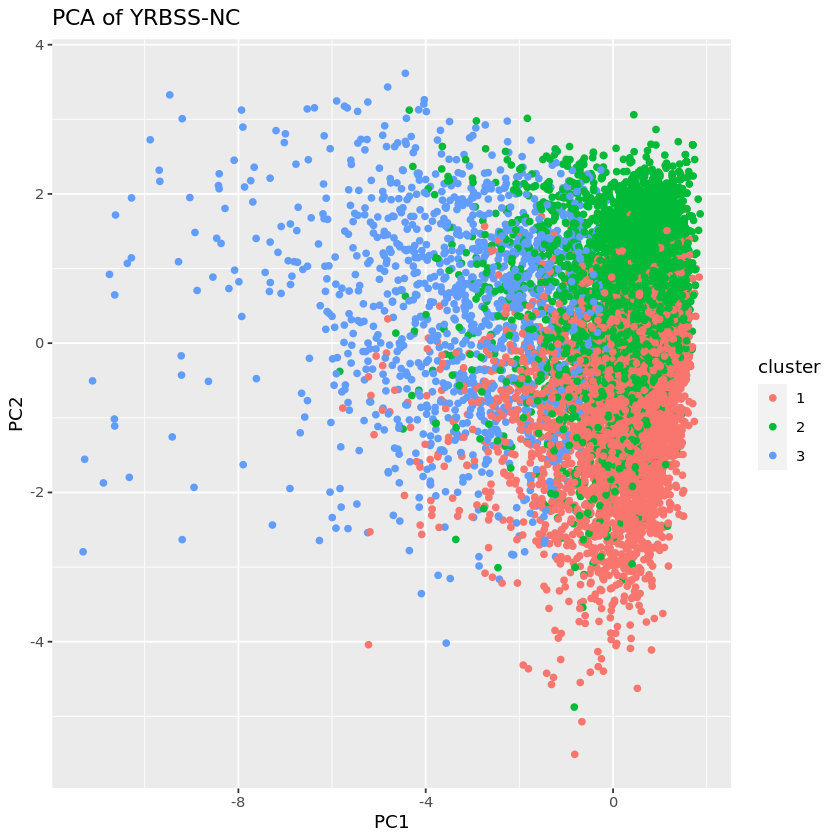

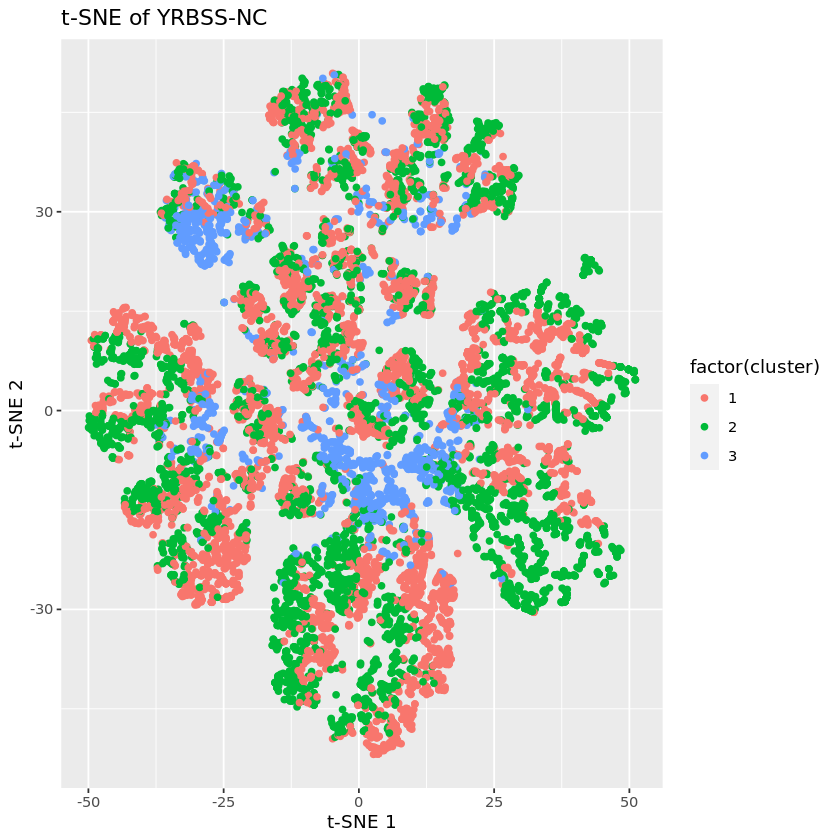

In [15]:
suppressPackageStartupMessages(library(Rtsne))
YRBSS_scaled <- YRBSS_k %>%
  mutate(
    across(
      .cols = -cluster,
      .fns = ~ as.numeric(scale(.x))
    )
  )
YRBSS_result <- prcomp(
  YRBSS_k %>% select(-cluster),
  center = TRUE,
  scale. = TRUE,
)
summary(YRBSS_result)
YRBSS_result$rotation
YRBSS_PCA <- as.data.frame(YRBSS_result$x)
YRBSS_PCA$cluster <- as.factor(YRBSS_k$cluster)

ggplot(YRBSS_PCA, aes(x = PC1, y = PC2, color = cluster)) +
geom_point() +
labs(title = "PCA of YRBSS-NC", x = "PC1", y = "PC2")
set.seed(123)
tsne <- YRBSS_PCA %>%
select(PC1:PC10) %>%
as.matrix()
tsne_out <- Rtsne(tsne, dims = 2, check_duplicates = FALSE)

results <- as_tibble(tsne_out$Y, .name_repair = "minimal")
colnames(results) <- c("Dim1", "Dim2")
results$cluster <- YRBSS_scaled$cluster

ggplot(results, aes(x = Dim1, y = Dim2, color = factor(cluster))) +
geom_point() +
labs(title = "t-SNE of YRBSS-NC", x = "t-SNE 1", y = "t-SNE 2")

### Explanation of Visualization

1. The data does not contain any strong clusters. This is clear due to PC1 explaining 15.9% of the variance and through PC10, only 76% of variance is explained. There are no large directions of variation, causing the t-SNE to make a flower shape with each petal shape showing tiny differences.
2. Several variables are small categorical ranges instead of large quantitative ranges, which cause a lot of near duplicate observations that do not vary by large amounts. This is why there is high density of observations in the center.
3. The kmeans we created does not come from real structure, which is why we see petals split in half between red and green throughout the T-SNE. On certain variables, one cluster has higher scores than the other cluster, and vice versa on other variables.
4. The cluster occupying the center represents the "average" group being closest the the global mean due to points being equally similar to many groups

### Conclusion for clustering
All of these variables impact each other to similar degrees, causing clear clusterization to struggle due to no strong bonds between certain responses. The cluster in the center likely represents students who engage less in deviant behaviors while the outer groups likely engage more in deviant behaviors in different ways.

## Logistic Regression (Classification)  

### Main research question:
Can we predict if a student had made a plan to commit suicide in the last year (PLAN_D) based on our other variables?  

### Scale data and split it 75/25 training/testing. Set seed = 123:

In [17]:
scale <- function(x){
(x - min(x)) / (max(x) - min(x))
}
YRBSS_LR <- YRBSS_100 %>% select(where(is.numeric)) %>%
mutate(across(where(is.numeric), scale))

set.seed(123)
n <- nrow(YRBSS_100)
train_idx <- sample.int(n, size = floor(0.1 * n))
YRBSS_train <- YRBSS_100 %>% slice(train_idx)
YRBSS_test <- YRBSS_100 %>% slice(setdiff(seq_len(n), train_idx))
YRBSS_train %>% write_csv('YRBSS_train.csv')
YRBSS_test %>% write_csv('YRBSS_test.csv')

### Fit the model. Shift PLAN_D from 1,2 code to 0,1:  

*NOTE* 0 = Yes and 1 = No now, which will need to be remembered when completing interpretations.

In [18]:
YRBSS_train$PLAN_D <- ifelse(YRBSS_train$PLAN_D == 2, 1, 0)

f <- PLAN_D ~ .
m <- glm(f, data = YRBSS_train, family = binomial())
summary(m)


Call:
glm(formula = f, family = binomial(), data = YRBSS_train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.76294    1.28298  -1.374  0.16941    
SEX          1.00793    0.20473   4.923 8.52e-07 ***
GRADE        0.14879    0.08698   1.711  0.08716 .  
RACE7       -0.08464    0.05692  -1.487  0.13700    
FIGHT       -0.14560    0.07505  -1.940  0.05237 .  
DRINK       -0.12772    0.08964  -1.425  0.15419    
MARIJUANA   -0.18217    0.07641  -2.384  0.01712 *  
MULTPART    -0.14303    0.06180  -2.314  0.02065 *  
ACTIVITY     0.02333    0.03767   0.619  0.53566    
SLEEP        0.19339    0.06959   2.779  0.00545 ** 
GRADES      -0.11465    0.06460  -1.775  0.07593 .  
BULLIED_D    1.01113    0.19446   5.200 2.00e-07 ***
WEIGHT_D     0.12517    0.18979   0.660  0.50955    
VAPE_D       0.33038    0.34857   0.948  0.34322    
FRUIT_D      0.30624    0.35397   0.865  0.38695    
VEG_D       -0.31220    0.34759  -0.898  0.36909    
---
Signif. codes: 

### Make predictions on test data.

In [19]:
YRBSS_test$PLAN_D <- ifelse(YRBSS_test$PLAN_D == 2, 1, 0)

p <- predict(m, newdata = YRBSS_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- YRBSS_test$PLAN_D
tp <- sum(pred == 0 & truth == 0)
fp <- sum(pred == 0 & truth == 1)
tn <- sum(pred == 1 & truth == 1)
fn <- sum(pred == 1 & truth == 0)
acc <- (tp + tn) / (tp + fp + tn + fn)

YRBSS_x <- tibble(
measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
value = c(tp, fp, tn, fn, acc)
)
YRBSS_x

table(YRBSS_100$PLAN_D)

measure,value
<chr>,<dbl>
True Positive,181.0000000
False Positive,164.0000000
True Negative,8527.0000000
False Negative,1243.0000000
Accuracy,0.8608997



   1    2 
1608 9630 

### LASSO Regression

In [21]:
install.packages("glmnet")
install.packages("broom")
install.packages("gridExtra")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [22]:
suppressPackageStartupMessages(library(glmnet))
suppressPackageStartupMessages(library(broom))
suppressPackageStartupMessages(library(gridExtra))

set.seed(123)
# Response and predictor matrices
y <- YRBSS_100$PLAN_D
X <- model.matrix(PLAN_D ~ ., YRBSS_100)[, -1]   # remove intercept column

# Fit cross-validated LASSO
cvfit <- cv.glmnet(X, y, alpha = 1)
fit <- cvfit$glmnet.fit

best_fit <- glmnet(X,y,lambda=cvfit$lambda.min)
best_fit$beta

15 x 1 sparse Matrix of class "dgCMatrix"
                    s0
SEX        0.070971832
GRADE      0.019269314
RACE7     -0.002241683
FIGHT     -0.017057202
DRINK     -0.023391980
MARIJUANA -0.011650314
MULTPART  -0.011860910
ACTIVITY   0.003892341
SLEEP      0.031782674
GRADES    -0.013423783
BULLIED_D  0.156913583
WEIGHT_D   0.023126767
VAPE_D     0.062745045
FRUIT_D   -0.017342939
VEG_D      .          

### Interpretation of Regression:
1. The following predicted a greater likelihood of having planned a suicide attempt in the past year (in order of significance):
a. Identifying as female
b. Reported experiencing bullying in the past year
c. Decreasing hours of sleep per night
d. Increasing frequency of marijuana use
e. Increase number of intimate partners
2. Based on our predictions of the test data, there were nearly as many false positives as there were true due the the large proportion (85.7%) of negatives, but our accuracy was slightly better than our baseline proportion, raising itself to 86.1%.
3. Our LASSO regression revealed a much greater impact from experiencing bullying in the past year from our initial logistic regression, and has been identified as our key explanatory variable. Other smaller indicators were female gender, vaped in past month, and decreased hours of sleep. The only variable out of the list to be classified as absolutely no prediction was vegetable consumption.  

### Conclusion of Regression:
An individuals likelihood of planning to take their life is different than the actual act of doing so, as we do not have their data if they are not alive to respond. Therefore, our conclusions are based on those who had a desire to but had not by the time of data collection. Female respondents likely put more thought into planning to take their life while male respondents act on more rash thoughts. As well, experiencing bullying as well as poor average sleep can significantly impact one's mental health to drive these thoughts as well. The other variables that had a smaller effect could likely be attributed to confounding association of other variables and will not be mentioned explicitly along side gender, bullying, and sleep. 

###  Future directions of this data and research:
If variables were trimmed down based on further logistic regression to determine what other key variables are influenced by, we may start to see more clear clusterization, but for now there are too many variables that are causing wide influence over others that prevent groupings to naturally form. As well, this data being mostly ordinal, categorical, and dichotomous may be better suited for non-continuous/quantitative analyses like what we used. ROC curves, confusion matrices, and other analyses would be better suited if this data was to be continued in research.